# Calculating image moments

Image moments are statistical values computed from an image. They allow us to analyze the image as a whole. Note that it's often useful to extract contours first, and only then compute and work with each component moment, independently. In this recipe, you will learn how to compute moments for binary/grayscale images.

For binary or grayscale images, image moments are computed using the OpenCV function `cv2.moments`. It returns a dict of the calculated moments, with their respective names.

# [Моменты изображения](https://ru.wikipedia.org/wiki/Моменты_изображения)

__Моменты изображения__ (англ. *image moments*) в [компьютерном зрении](https://ru.wikipedia.org/wiki/Компьютерное_зрение), [обработке изображений](https://ru.wikipedia.org/wiki/Обработка_изображений) и смежных областях — некоторые частные средневзвешенные (момент) интенсивностей [пикселей](https://ru.wikipedia.org/wiki/Пиксель) изображения, или функция таких моментов. Как правило, выбираются моменты, имеющие полезные свойства или интерпретации.

В самом общем смысле момент функции — это некая скалярная величина, которая характеризует эту функцию и может быть использована для артикуляции её важных свойств. С математической точки зрения набор моментов является в некотором смысле «проекцией» функции на [полиномиальный](https://ru.wikipedia.org/wiki/Многочлен) базис. Он аналогичен [преобразованию Фурье](https://ru.wikipedia.org/wiki/Преобразование_Фурье), которое представляет из себя проекцию функции на базис из гармонических функций.

Моменты изображения полезны для описания объектов после [сегментации](https://ru.wikipedia.org/wiki/Сегментация_(обработка_изображений)). Простые свойства изображения, которые можно найти с помощью моментов, включают в себя площадь (или суммарную интенсивность), геометрический центр и информацию об ориентации. Кроме них в математической статистике давно применяются моменты более высоких порядков, например [коэффициент асимметрии](https://ru.wikipedia.org/wiki/Коэффициент_асимметрии) и [коэффициент эксцесса](https://ru.wikipedia.org/wiki/Коэффициент_эксцесса).

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S03\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s03\env

d:\html_doc\program\opencv\packt\s03\env\lib\site-packages
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


In [2]:
image = np.zeros((480, 640), np.uint8)
cv2.ellipse(image, (320, 240), (200, 100), 0, 0, 360, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

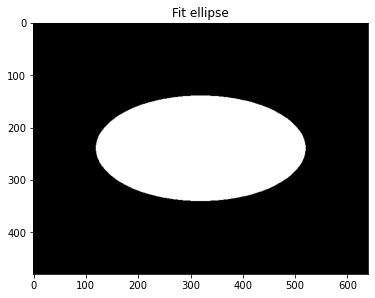

In [3]:
plt_view_image(plt,[["Fit ellipse",image]], figsize=(6,6), axis='on', cmap='gray')

In [4]:
#Момент изображения — это суммарная характеристика цветового пятна, представляющая собой сумму всех точек (пикселей) этого пятна.
#При этом, имеется множество подвидов моментов, характеризующие разные свойства изображения. Например, 
#   m00 момент нулевого порядка — это количество всех точек, составляющих пятно. 
#   m10 Момент первого порядка  представляет собой сумму X координат точек, а 
#   m01 — сумму Y координат. Имеются также моменты 
# m11, m20, m02, m22 и т.д. 

m = cv2.moments(image)

for name, val in m.items():
    print(name, '\t', val)

m00 	 16119315.0
m10 	 5158101240.0
m01 	 3868620810.0
m20 	 1812142855350.0
m11 	 1237939564800.0
m02 	 969157708320.0
m30 	 683285449618080.0
m21 	 434912202354750.0
m12 	 310125260718570.0
m03 	 252129278267070.0
mu20 	 161575917357.3161
mu11 	 -72.99898365715876
mu02 	 40692263506.429634
mu30 	 1687957749.1273296
mu21 	 -420182048.74010897
mu12 	 -422443285.191627
mu03 	 105694127.70601428
nu20 	 0.0006218468887998856
nu11 	 -2.809465148965929e-13
nu02 	 0.00015660970937729057
nu30 	 1.6180618413372907e-09
nu21 	 -4.027829131581005e-10
nu12 	 -4.049505150535472e-10
nu03 	 1.0131748557269813e-10


In [5]:
# вычисляем моменты изображения
sum_y = m['m01']
sum_x = m['m10']
sum_pixel = m['m00'] 


print('Center X estimated:', m['m10'] / m['m00'])
print('Center Y estimated:', m['m01'] / m['m00'])

Center X estimated: 319.9950643063927
Center Y estimated: 239.999082467214
